In [4]:
pip install pymc3

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip upgrade pymc3

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "update"



In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = np.random.randn(100)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [std_dev, mean]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 41 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mean    -0.015  0.103  -0.195    0.185      0.001    0.001    6894.0   
std_dev  1.029  0.075   0.889    1.164      0.001    0.001    6309.0   

         ess_tail  r_hat  
mean       5402.0    1.0  
std_dev    5226.0    1.0  


C:\Users\Talha\AppData\Local\Temp\ipykernel_9212\3539838283.py:10: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


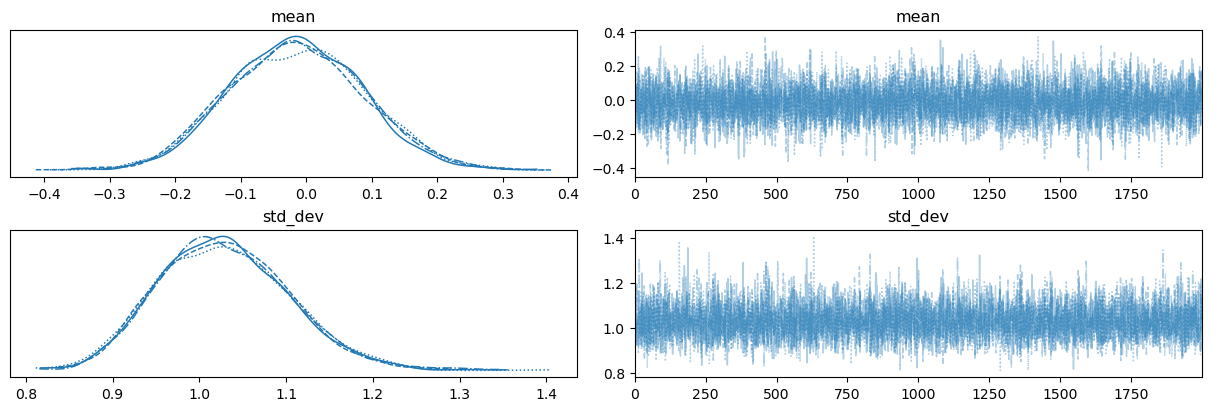

In [5]:
with pm.Model() as model:
# Prior distribuƟon for the mean
    mean = pm.Normal("mean", mu=0, sigma=1)
# Prior distribuƟon for the standard deviaƟon
    std_dev = pm.HalfNormal("std_dev", sigma=1)
    likelihood = pm.Normal("likelihood", mu=mean, sigma=std_dev, observed=data)
    trace = pm.sample(2000, tune=1000, cores=4, chains=4)
    summary = pm.summary(trace)
    print(summary)
    pm.traceplot(trace)
    plt.show()

In [6]:
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt

In [7]:
data = pd.read_csv("C:/Users/Talha/Downloads/emails.csv")

In [9]:
y = data['predictions'].values

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_spam]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.
C:\Users\Talha\AppData\Local\Temp\ipykernel_9212\985383703.py:11: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


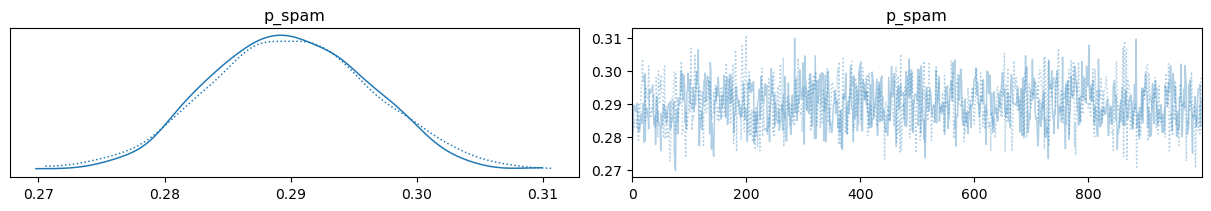

In [31]:
with pm.Model() as spam_model:
    p_spam = pm.Beta('p_spam', alpha=1, beta=1)
    likelihood = pm.Bernoulli('likelihood', p=p_spam, observed=y)

with spam_model:

        trace = pm.sample (1000, tune=1000)

        pm.summary(trace)

        pm.traceplot(trace)
new_message = "this is spam"
p_spam_samples = trace['p_spam']
p_spam_prediction = (p_spam_samples > 0.5).mean()